<h1 style="color:blue;">Creating Recommender System and Using NLP</h1> 
<strong>  Anoulom Phimphivong</strong> <br>


## 1. Import Libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns



# New trick to widen the screen
from IPython.core.display import display, HTML

#Widens the code landscape 
display(HTML("<style>.container { width:95% !important; }</style>"))

pd.set_option('display.max_columns',500) #allows for up to 500 columns to be displayed when viewing a dataframe

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

pd.options.mode.chained_assignment = None


plt.style.use('seaborn-colorblind') 

%matplotlib inline

## 2. Import Data

In [2]:
# import all the restaurants
df_rest = pd.read_csv("data/Restaurants.csv", index_col=None, header=0)

# import all the users
df_user = pd.read_csv("data/Full_User.csv", index_col=None, header=0)

#import all restaurants ratings
df_reviews_all = pd.read_csv("data/Ontario_Reviews.csv", index_col=None, header=0)

## 4. View Data

In [3]:
df_rest

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,8,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,404 E Green St,Champaign,IL,61820,40.110446,-88.233073,4.5,5,1,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...","Ethnic Food, Food Trucks, Specialty Food, Impo...","{'Monday': '11:30-14:30', 'Tuesday': '11:30-14..."
1,20,CsLQLiRoafpJPJSkNX2h5Q,Middle East Deli,4508 E Independence Blvd,Charlotte,NC,28205,35.194894,-80.767442,3.0,5,0,"{'RestaurantsGoodForGroups': 'True', 'OutdoorS...","Food, Restaurants, Grocery, Middle Eastern",NaN
2,24,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,"15480 Bayview Avenue, unit D0110",Aurora,ON,L4G 7J1,44.010962,-79.448677,4.5,4,1,"{'RestaurantsTableService': 'False', 'Restaura...","Restaurants, Cheesesteaks, Poutineries","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
3,25,lu7vtrp_bE9PnxWfA8g4Pg,Banzai Sushi,300 John Street,Thornhill,ON,L3T 5W4,43.820492,-79.398466,4.5,7,1,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...","Japanese, Fast Food, Food Court, Restaurants",NaN
4,30,9sRGfSVEfLhN_km60YruTA,Apadana Restaurant,13071 Yonge Street,Richmond Hill,ON,L4E 1A5,43.947011,-79.454862,3.0,3,1,"{'Ambience': ""{'touristy': False, 'hipster': F...","Persian/Iranian, Turkish, Middle Eastern, Rest...","{'Tuesday': '12:0-21:0', 'Wednesday': '12:0-21..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63939,209381,xVpE01l6ZXdEtVf5PkRpDg,Julep,829 E Washington Ave,Madison,WI,53703,43.081022,-89.374006,4.0,95,0,"{'NoiseLevel': ""u'average'"", 'BikeParking': 'T...","Nightlife, Diners, Bars, Southern, Restaurants","{'Monday': '16:0-22:0', 'Tuesday': '16:0-22:0'..."
63940,209383,BAVuLTDmpSzDCk37A5HjtQ,Bruegger's Bagels,27045 Lorain Rd,North Olmsted,OH,44070,41.416568,-81.921396,3.0,13,0,"{'NoiseLevel': ""u'average'"", 'BikeParking': 'F...","Restaurants, Sandwiches, Food, Breakfast & Bru...","{'Monday': '5:30-15:0', 'Tuesday': '5:30-15:0'..."
63941,209385,hskVqZCPqy-omm9CHi44xQ,Domino's,"6420 Rea Rd, Suite B1",Charlotte,NC,28226,35.078538,-80.818358,2.0,16,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Restaurants, Pizza, Sandwiches, Fast Food, Chi...","{'Monday': '10:30-0:0', 'Tuesday': '10:30-0:0'..."
63942,209388,9Q0fPWAjUweoFDk0kafuzQ,Nishi Sushi,9750 Weston Road,Vaughan,ON,L4H 2P2,43.838555,-79.559823,4.0,5,0,"{'Ambience': ""{'romantic': False, 'intimate': ...","Japanese, Sushi Bars, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."


In [4]:
df_rest=df_rest.drop('stars',axis=1)

In [5]:
df_rest

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,review_count,is_open,attributes,categories,hours
0,8,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,404 E Green St,Champaign,IL,61820,40.110446,-88.233073,5,1,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...","Ethnic Food, Food Trucks, Specialty Food, Impo...","{'Monday': '11:30-14:30', 'Tuesday': '11:30-14..."
1,20,CsLQLiRoafpJPJSkNX2h5Q,Middle East Deli,4508 E Independence Blvd,Charlotte,NC,28205,35.194894,-80.767442,5,0,"{'RestaurantsGoodForGroups': 'True', 'OutdoorS...","Food, Restaurants, Grocery, Middle Eastern",NaN
2,24,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,"15480 Bayview Avenue, unit D0110",Aurora,ON,L4G 7J1,44.010962,-79.448677,4,1,"{'RestaurantsTableService': 'False', 'Restaura...","Restaurants, Cheesesteaks, Poutineries","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
3,25,lu7vtrp_bE9PnxWfA8g4Pg,Banzai Sushi,300 John Street,Thornhill,ON,L3T 5W4,43.820492,-79.398466,7,1,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...","Japanese, Fast Food, Food Court, Restaurants",NaN
4,30,9sRGfSVEfLhN_km60YruTA,Apadana Restaurant,13071 Yonge Street,Richmond Hill,ON,L4E 1A5,43.947011,-79.454862,3,1,"{'Ambience': ""{'touristy': False, 'hipster': F...","Persian/Iranian, Turkish, Middle Eastern, Rest...","{'Tuesday': '12:0-21:0', 'Wednesday': '12:0-21..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63939,209381,xVpE01l6ZXdEtVf5PkRpDg,Julep,829 E Washington Ave,Madison,WI,53703,43.081022,-89.374006,95,0,"{'NoiseLevel': ""u'average'"", 'BikeParking': 'T...","Nightlife, Diners, Bars, Southern, Restaurants","{'Monday': '16:0-22:0', 'Tuesday': '16:0-22:0'..."
63940,209383,BAVuLTDmpSzDCk37A5HjtQ,Bruegger's Bagels,27045 Lorain Rd,North Olmsted,OH,44070,41.416568,-81.921396,13,0,"{'NoiseLevel': ""u'average'"", 'BikeParking': 'F...","Restaurants, Sandwiches, Food, Breakfast & Bru...","{'Monday': '5:30-15:0', 'Tuesday': '5:30-15:0'..."
63941,209385,hskVqZCPqy-omm9CHi44xQ,Domino's,"6420 Rea Rd, Suite B1",Charlotte,NC,28226,35.078538,-80.818358,16,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Restaurants, Pizza, Sandwiches, Fast Food, Chi...","{'Monday': '10:30-0:0', 'Tuesday': '10:30-0:0'..."
63942,209388,9Q0fPWAjUweoFDk0kafuzQ,Nishi Sushi,9750 Weston Road,Vaughan,ON,L4H 2P2,43.838555,-79.559823,5,0,"{'Ambience': ""{'romantic': False, 'intimate': ...","Japanese, Sushi Bars, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."


## 5. Create dataframes

### 5a. Create df_rest_reviews_chinese from all reviews

In [6]:
df_user

,Unnamed: 0,user_id,name,review_count,yelping_since,useful,funny,cool,elite,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,0,---1lKK3aKOuomHnwAkAow,Monera,263,2007-06-04 01:37:45,500,180,201,"2010,2011,2012",17,3.93,2,3,2,1,0,5,9,9,9,9,0
1,1,---94vtJ_5o_nikEs6hUjg,Joe,5,2016-05-27 04:50:39,3,0,1,NaN,0,5.00,0,0,0,0,0,0,0,0,0,0,0
2,2,---PLwSf5gKdIoVnyRHgBA,Rae,3,2015-07-31 00:53:27,0,0,0,NaN,0,4.33,0,0,0,0,0,0,0,0,0,0,0
3,3,---RfKzBwQ8t3wu-LXvx3w,Jason,1,2015-11-23 14:19:04,0,0,0,NaN,0,5.00,0,0,0,0,0,0,0,0,0,0,0
4,4,---cu1hq55BP9DWVXXKHZg,Jack,66,2009-04-18 23:10:01,134,54,24,NaN,0,3.70,0,0,0,0,0,3,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399948,1399948,zzzDGuK7upfx0W31A4gfCA,Leticia,4,2017-02-01 20:45:31,4,0,3,NaN,0,4.00,0,0,0,0,0,0,0,0,0,0,0
1399949,1399949,zzzPVqSxSvjzlLR3Q7wsUw,Alex,12,2010-05-01 08:12:02,4,1,3,NaN,0,4.17,0,0,0,0,0,0,0,1,1,0,0
1399950,1399950,zzzTkKLFo9CaeZnfO4TvzA,Alfonso,13,2014-02-25 21:03:55,13,18,8,NaN,0,2.31,0,0,0,0,0,1,0,0,0,0,0
1399951,1399951,zzzmshdEWLFCApxETl1TGQ,Dave,3,2012-10-08 22:47:56,0,0,0,NaN,0,5.00,0,0,0,0,0,0,0,0,0,0,0


In [7]:
df_reviews_all

,Unnamed: 0,business_id,name,review_id,user_id,stars,useful,funny,cool,text,date
0,0,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,gwU0Brt7bYIgFJeBhrmmmA,coSXdeklwuZWjjS0n38Tcg,5.0,0.0,0.0,0.0,The cheese steak is great here. The guys cooki...,2019-01-26 14:59:53
1,1,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,wt8t7boUicBVutypSIFBfg,pCYmjT_-KrBvFfiazMlaLQ,4.0,0.0,0.0,0.0,I've been here 4 times now and the Philly chee...,2019-11-16 17:02:55
2,2,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,tZ5DuKIfUuuhxGYV7ywhvw,8U9jNGWvX1kZR-So3KNPiA,5.0,0.0,0.0,0.0,Excellent Excellent customer service!!\nWill d...,2019-10-11 19:59:57
3,3,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,rqa4ZB6yz-68G5GEXuZJyA,xo8HykGB7Ekm_QKrMRg3Zw,4.0,0.0,0.0,0.0,Came here on a Friday night and only 1 table w...,2019-07-26 13:24:49
4,4,lu7vtrp_bE9PnxWfA8g4Pg,Banzai Sushi,Q7iupWCt3UpRQSMKp4zO9A,dSTRQSeCqMTbs7l8KF_xJg,4.0,1.0,0.0,0.0,Been coming here since I was in grade 9 so abo...,2015-04-16 05:23:15
...,...,...,...,...,...,...,...,...,...,...,...
668870,668870,9Q0fPWAjUweoFDk0kafuzQ,Nishi Sushi,UflF294ggjTR7OXJZyX14Q,tRZAC_H5RHrjvyvtufcNXQ,4.0,0.0,0.0,0.0,Went: 7:30 pm Thu May 21 2015 (6th couple date...,2015-07-08 22:49:17
668871,668871,9Q0fPWAjUweoFDk0kafuzQ,Nishi Sushi,olpGCrvMKZjsFpYPwvwLbQ,2CALR5iCk-ZkyFcKJ27DUA,4.0,2.0,1.0,1.0,This is one of our regular spots to get take o...,2014-10-24 00:41:31
668872,668872,9Q0fPWAjUweoFDk0kafuzQ,Nishi Sushi,PfdVcAzoTaJ-AeGSQXCPzQ,i7mBC7m7k2FLrdVUx0UqUg,3.0,3.0,2.0,3.0,"For food I would give them a 3, for service I ...",2014-07-22 17:58:25
668873,668873,9Q0fPWAjUweoFDk0kafuzQ,Nishi Sushi,_NDUdjPh1llvsyUELmEPSg,2uiwzYXk8xVcv6U_ds5f0Q,5.0,0.0,0.0,0.0,"Food was fresh, tasted great and was well pres...",2012-10-28 16:11:39


In [8]:
df_rest_reviews = df_reviews_all.merge(df_user,on='user_id').merge(df_rest,on='business_id')

In [9]:
df_rest_reviews

,Unnamed: 0_x,business_id,name_x,review_id,user_id,stars,useful_x,funny_x,cool_x,text,date,Unnamed: 0_y,name_y,review_count_x,yelping_since,useful_y,funny_y,cool_y,elite,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,Unnamed: 0,name,address,city,state,postal_code,latitude,longitude,review_count_y,is_open,attributes,categories,hours
0,0,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,gwU0Brt7bYIgFJeBhrmmmA,coSXdeklwuZWjjS0n38Tcg,5.0,0.0,0.0,0.0,The cheese steak is great here. The guys cooki...,2019-01-26 14:59:53,893172,Jay,5,2017-10-30 11:37:05,1,1,0,NaN,0,3.60,0,0,0,0,0,0,0,0,0,0,0,24,Philthy Phillys,"15480 Bayview Avenue, unit D0110",Aurora,ON,L4G 7J1,44.010962,-79.448677,4,1,"{'RestaurantsTableService': 'False', 'Restaura...","Restaurants, Cheesesteaks, Poutineries","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
1,1,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,wt8t7boUicBVutypSIFBfg,pCYmjT_-KrBvFfiazMlaLQ,4.0,0.0,0.0,0.0,I've been here 4 times now and the Philly chee...,2019-11-16 17:02:55,1164034,Jeff,20,2017-01-06 03:02:46,0,0,0,NaN,0,3.86,0,0,0,0,0,0,0,0,0,0,0,24,Philthy Phillys,"15480 Bayview Avenue, unit D0110",Aurora,ON,L4G 7J1,44.010962,-79.448677,4,1,"{'RestaurantsTableService': 'False', 'Restaura...","Restaurants, Cheesesteaks, Poutineries","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
2,2,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,tZ5DuKIfUuuhxGYV7ywhvw,8U9jNGWvX1kZR-So3KNPiA,5.0,0.0,0.0,0.0,Excellent Excellent customer service!!\nWill d...,2019-10-11 19:59:57,207441,Shoaib Tanvir Accounting,7,2018-09-12 14:15:38,1,0,0,NaN,0,4.14,0,0,0,0,0,0,0,0,0,0,0,24,Philthy Phillys,"15480 Bayview Avenue, unit D0110",Aurora,ON,L4G 7J1,44.010962,-79.448677,4,1,"{'RestaurantsTableService': 'False', 'Restaura...","Restaurants, Cheesesteaks, Poutineries","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
3,3,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,rqa4ZB6yz-68G5GEXuZJyA,xo8HykGB7Ekm_QKrMRg3Zw,4.0,0.0,0.0,0.0,Came here on a Friday night and only 1 table w...,2019-07-26 13:24:49,1352053,Terry,34,2014-02-11 23:38:56,16,8,11,NaN,0,3.09,0,0,0,0,0,2,2,2,2,1,0,24,Philthy Phillys,"15480 Bayview Avenue, unit D0110",Aurora,ON,L4G 7J1,44.010962,-79.448677,4,1,"{'RestaurantsTableService': 'False', 'Restaura...","Restaurants, Cheesesteaks, Poutineries","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
4,111974,n6eRADUe9PXz3qfZ69hT8A,Lee Chen Asian Bistro,aJfHOI9WdHQcb8YHBM1Waw,coSXdeklwuZWjjS0n38Tcg,5.0,0.0,0.0,0.0,Tried this place 3 times now. First time it w...,2019-08-09 19:19:05,893172,Jay,5,2017-10-30 11:37:05,1,1,0,NaN,0,3.60,0,0,0,0,0,0,0,0,0,0,0,38737,Lee Chen Asian Bistro,"84 First Commerce Drive, Unit 5",Aurora,ON,L4G 0H5,44.013130,-79.415485,31,1,"{'GoodForMeal': ""{'dessert': False, 'latenight...","Restaurants, Chinese","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668857,635073,ZALVCrIRwuvTrQlPnSHdVw,Two Peas,lm0i9movwBGc6OshuET49Q,grk7KuM4GJodtSApEIdTBQ,5.0,0.0,0.0,0.0,Nous sommes demeurées au two peas lors de leur...,2018-07-04 13:58:10,981727,Lori,2,2015-02-07 16:47:44,0,0,0,NaN,1,5.00,0,0,0,0,0,0,0,0,0,0,0,198934,Two Peas,403 Spadina Avenue,Toronto,ON,M5T 2G6,43.656753,-79.399235,6,1,"{'WiFi': ""u'free'"", 'DogsAllowed': 'False', 'C...","Shopping, Coffee & Tea, Cafes, Hostels, Food, ...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
668858,635074,ZALVCrIRwuvTrQlPnSHdVw,Two Peas,7APmJu_SYr8NvA1tXbGYkg,AHiNcn4A870ZKPO0S7oSkw,5.0,1.0,0.0,1.0,This is the best hostel I have ever stayed at!...,2019-08-03 04:56:20,246811,Kendra,321,2010-04-03 01:28:21,1142,466,740,"2016,2017,2018",37,3.91,7,5,1,0,0,44,24,49,49,43,16,198934,Two Peas,403 Spadina Avenue,Toronto,ON,M5T 2G6,43.656753,-79.399235,6,1,

In [10]:
df_rest_reviews_chinese=df_rest_reviews[df_rest_reviews['categories'] == 'Restaurants, Chinese']

In [11]:
df_rest_reviews_chinese

,Unnamed: 0_x,business_id,name_x,review_id,user_id,stars,useful_x,funny_x,cool_x,text,date,Unnamed: 0_y,name_y,review_count_x,yelping_since,useful_y,funny_y,cool_y,elite,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,Unnamed: 0,name,address,city,state,postal_code,latitude,longitude,review_count_y,is_open,attributes,categories,hours
4,111974,n6eRADUe9PXz3qfZ69hT8A,Lee Chen Asian Bistro,aJfHOI9WdHQcb8YHBM1Waw,coSXdeklwuZWjjS0n38Tcg,5.0,0.0,0.0,0.0,Tried this place 3 times now. First time it w...,2019-08-09 19:19:05,893172,Jay,5,2017-10-30 11:37:05,1,1,0,NaN,0,3.60,0,0,0,0,0,0,0,0,0,0,0,38737,Lee Chen Asian Bistro,"84 First Commerce Drive, Unit 5",Aurora,ON,L4G 0H5,44.013130,-79.415485,31,1,"{'GoodForMeal': ""{'dessert': False, 'latenight...","Restaurants, Chinese","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:..."
5,111960,n6eRADUe9PXz3qfZ69hT8A,Lee Chen Asian Bistro,zy_I3bySKKbj1vrPncyQ9Q,hrYOEsw6YkYTf9joi_styw,3.0,4.0,0.0,0.0,My first impression on this new restaurant in ...,2018-10-20 18:15:55,1003309,Dennis,194,2015-09-20 22:14:52,190,35,76,"2016,2017,2018",6,3.81,1,1,0,0,0,3,3,3,3,4,3,38737,Lee Chen Asian Bistro,"84 First Commerce Drive, Unit 5",Aurora,ON,L4G 0H5,44.013130,-79.415485,31,1,"{'GoodForMeal': ""{'dessert': False, 'latenight...","Restaurants, Chinese","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:..."
6,111968,n6eRADUe9PXz3qfZ69hT8A,Lee Chen Asian Bistro,-YHXvfOA1ouVN_gy81VI3w,fU-SK63oyqHod7AHbIDgEw,4.0,1.0,1.0,1.0,"This place surprised us with good service, dec...",2019-03-24 02:55:47,951384,Arseny,92,2012-10-13 14:00:08,47,17,18,"2017,2018",1,3.30,0,1,0,0,0,2,1,1,1,1,0,38737,Lee Chen Asian Bistro,"84 First Commerce Drive, Unit 5",Aurora,ON,L4G 0H5,44.013130,-79.415485,31,1,"{'GoodForMeal': ""{'dessert': False, 'latenight...","Restaurants, Chinese","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:..."
7,111961,n6eRADUe9PXz3qfZ69hT8A,Lee Chen Asian Bistro,9cjF7juQc-Xa5DseN-Wwvw,CZdIOLep9szqUkE3VfDZag,5.0,1.0,1.0,1.0,"So, I'll start with my summary...amazing food,...",2018-11-17 23:49:20,296595,Chris,97,2014-07-29 01:58:15,64,12,18,"2016,2017,2018",2,4.02,0,0,0,0,0,4,4,3,3,3,0,38737,Lee Chen Asian Bistro,"84 First Commerce Drive, Unit 5",Aurora,ON,L4G 0H5,44.013130,-79.415485,31,1,"{'GoodForMeal': ""{'dessert': False, 'latenight...","Restaurants, Chinese","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:..."
8,111965,n6eRADUe9PXz3qfZ69hT8A,Lee Chen Asian Bistro,pTVcg2mhGTV1oYRdZFCHqA,nhdcRg-PdipWhVb8aH398A,4.0,0.0,0.0,0.0,"Opened 3 days ago, I tried it out last night. ...",2018-09-13 23:24:06,1131527,C.,64,2013-10-13 18:14:54,9,5,0,NaN,0,3.20,0,0,0,0,0,0,0,1,1,0,0,38737,Lee Chen Asian Bistro,"84 First Commerce Drive, Unit 5",Aurora,ON,L4G 0H5,44.013130,-79.415485,31,1,"{'GoodForMeal': ""{'dessert': False, 'latenight...","Restaurants, Chinese","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668519,419343,GFBiGcIZ8Wqm6wtTLRxF8Q,Taste of Qin Yun,dKTgLvB9U1diEI33kr4tZg,QT2hy5JcEvHnLVYSkdRKKQ,4.0,1.0,0.0,0.0,Very simple eatery that offers authentic Weste...,2018-01-04 17:50:18,601037,Ling,4,2011-02-14 18:48:50,1,0,0,NaN,0,3.25,0,0,0,0,0,0,0,0,0,0,0,133800,Taste of Qin Yun,23 Bonis Avenue,Toronto,ON,M1T 2T9,43.783541,-79.298508,4,0,NaN,"Restaurants, Chinese",NaN
668520,419346,GFBiGcIZ8Wqm6wtTLRxF8Q,Taste of Qin Yun,-oAv7VdkoAN7Vvb_tKevsg,0hQtROTOFVJH6swKx9-6Ug,5.0,0.0,0.0,0.0,This place is OPEN. NOT CLOSED (as of Sep 1...,2019-09-10 15:49:48,37288,D,8,2017-01-07 13:44:59,0,0,0,NaN,0,2.88,0,0,0,0,0,0,0,0,0,0,0,133800,Taste of Qin Yun,23 Bonis Avenue,Toronto,ON,M1T 2T9,43.783541,-79.298508,4,0,NaN,"Restaurants, Chinese",NaN
668748,666460,T0e2IfsApEoS1QbJnpFgpw,Hakka International,AFBKd

In [12]:
df_rest_reviews_chinese['stars'].value_counts()

4.0    2921
3.0    1914
5.0    1696
1.0    1116
2.0     902
Name: stars, dtype: int64

### 5b. Create df_rest_reviews_chinese_good

In [75]:
#### A range of reviews or stars were considered for data frames for analysis. 
#### Good chinese resraurant at least had 4 or more star reviews, while bad reviews were 2 or under. 






df_rest_reviews_chinese_good=df_rest_reviews_chinese[df_rest_reviews_chinese['stars'] >= 4]

In [14]:
df_rest_reviews_chinese_good

,Unnamed: 0_x,business_id,name_x,review_id,user_id,stars,useful_x,funny_x,cool_x,text,date,Unnamed: 0_y,name_y,review_count_x,yelping_since,useful_y,funny_y,cool_y,elite,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,Unnamed: 0,name,address,city,state,postal_code,latitude,longitude,review_count_y,is_open,attributes,categories,hours
4,111974,n6eRADUe9PXz3qfZ69hT8A,Lee Chen Asian Bistro,aJfHOI9WdHQcb8YHBM1Waw,coSXdeklwuZWjjS0n38Tcg,5.0,0.0,0.0,0.0,Tried this place 3 times now. First time it w...,2019-08-09 19:19:05,893172,Jay,5,2017-10-30 11:37:05,1,1,0,NaN,0,3.60,0,0,0,0,0,0,0,0,0,0,0,38737,Lee Chen Asian Bistro,"84 First Commerce Drive, Unit 5",Aurora,ON,L4G 0H5,44.013130,-79.415485,31,1,"{'GoodForMeal': ""{'dessert': False, 'latenight...","Restaurants, Chinese","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:..."
6,111968,n6eRADUe9PXz3qfZ69hT8A,Lee Chen Asian Bistro,-YHXvfOA1ouVN_gy81VI3w,fU-SK63oyqHod7AHbIDgEw,4.0,1.0,1.0,1.0,"This place surprised us with good service, dec...",2019-03-24 02:55:47,951384,Arseny,92,2012-10-13 14:00:08,47,17,18,"2017,2018",1,3.30,0,1,0,0,0,2,1,1,1,1,0,38737,Lee Chen Asian Bistro,"84 First Commerce Drive, Unit 5",Aurora,ON,L4G 0H5,44.013130,-79.415485,31,1,"{'GoodForMeal': ""{'dessert': False, 'latenight...","Restaurants, Chinese","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:..."
7,111961,n6eRADUe9PXz3qfZ69hT8A,Lee Chen Asian Bistro,9cjF7juQc-Xa5DseN-Wwvw,CZdIOLep9szqUkE3VfDZag,5.0,1.0,1.0,1.0,"So, I'll start with my summary...amazing food,...",2018-11-17 23:49:20,296595,Chris,97,2014-07-29 01:58:15,64,12,18,"2016,2017,2018",2,4.02,0,0,0,0,0,4,4,3,3,3,0,38737,Lee Chen Asian Bistro,"84 First Commerce Drive, Unit 5",Aurora,ON,L4G 0H5,44.013130,-79.415485,31,1,"{'GoodForMeal': ""{'dessert': False, 'latenight...","Restaurants, Chinese","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:..."
8,111965,n6eRADUe9PXz3qfZ69hT8A,Lee Chen Asian Bistro,pTVcg2mhGTV1oYRdZFCHqA,nhdcRg-PdipWhVb8aH398A,4.0,0.0,0.0,0.0,"Opened 3 days ago, I tried it out last night. ...",2018-09-13 23:24:06,1131527,C.,64,2013-10-13 18:14:54,9,5,0,NaN,0,3.20,0,0,0,0,0,0,0,1,1,0,0,38737,Lee Chen Asian Bistro,"84 First Commerce Drive, Unit 5",Aurora,ON,L4G 0H5,44.013130,-79.415485,31,1,"{'GoodForMeal': ""{'dessert': False, 'latenight...","Restaurants, Chinese","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:..."
9,111957,n6eRADUe9PXz3qfZ69hT8A,Lee Chen Asian Bistro,6tXwB7PV3Uy4HWoZJj7hbg,w5bwTIjGTebtlWEEAxfKhg,4.0,2.0,0.0,1.0,Recently opened up in Aurora! This place is so...,2018-09-13 01:41:30,1314597,Alfred,237,2013-12-28 00:51:36,433,215,265,"2014,2015,2016,2017,2018",24,3.81,29,3,0,0,0,25,33,33,33,17,16,38737,Lee Chen Asian Bistro,"84 First Commerce Drive, Unit 5",Aurora,ON,L4G 0H5,44.013130,-79.415485,31,1,"{'GoodForMeal': ""{'dessert': False, 'latenight...","Restaurants, Chinese","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668027,644542,GZOFuQQDXxdjb8w03StJyg,Panda Garden,7rMvP99oqHp5moW9lsxuRg,EvPHyVkjtNE08PcnvIizSw,5.0,0.0,0.0,0.0,fresh and delicious!!!!! love the pad thai!!!!...,2019-07-14 23:28:41,348173,Alex,3,2011-11-21 18:38:24,1,0,0,NaN,0,3.33,0,0,0,0,0,0,0,0,0,0,0,201735,Panda Garden,"301 Queen Street S, Unit 3A",Caledon,ON,L7E 2B2,43.873978,-79.729370,4,1,NaN,"Restaurants, Chinese","{'Tuesday': '11:30-21:30', 'Wednesday': '11:30..."
668517,419344,GFBiGcIZ8Wqm6wtTLRxF8Q,Taste of Qin Yun,D-OfPDLhSIIfzptEGPOAhQ,PDiCx0MvDN-di5jAHvFQ1g,5.0,5.0,2.0,2.0,5/5 Food\n5/5 Price\n5/5 Service\n\nThis place...,2017-09-18 19:52:46,573683,Will,13,2015-11-07 23:06:16,31,26,18,NaN,0,4.62,3,1,0,2,0,0,0,3,3,3,0,133800,Taste of Qin Yun,23 Bonis Avenue,Toronto,ON,M1T 2T9,43.783541,-79.298508,4,0,NaN,"Res

### 5c. Create df_rest_reviews_chinese_bad

In [15]:
df_rest_reviews_chinese_bad=df_rest_reviews_chinese[df_rest_reviews_chinese['stars'] <= 2]

In [16]:
df_rest_reviews_chinese_bad

,Unnamed: 0_x,business_id,name_x,review_id,user_id,stars,useful_x,funny_x,cool_x,text,date,Unnamed: 0_y,name_y,review_count_x,yelping_since,useful_y,funny_y,cool_y,elite,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,Unnamed: 0,name,address,city,state,postal_code,latitude,longitude,review_count_y,is_open,attributes,categories,hours
22,111955,n6eRADUe9PXz3qfZ69hT8A,Lee Chen Asian Bistro,JgsJaDf7_ssb4_0C5oFHlA,8bcOl-aIf8nSPMkyhubfXA,2.0,3.0,1.0,0.0,Food is fine but is way too costly. Portion is...,2018-10-09 23:08:42,210345,Agnes,74,2013-01-26 01:35:51,25,7,18,2018,1,3.61,0,0,0,0,0,1,4,1,1,0,0,38737,Lee Chen Asian Bistro,"84 First Commerce Drive, Unit 5",Aurora,ON,L4G 0H5,44.013130,-79.415485,31,1,"{'GoodForMeal': ""{'dessert': False, 'latenight...","Restaurants, Chinese","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:..."
29,111951,n6eRADUe9PXz3qfZ69hT8A,Lee Chen Asian Bistro,mfRgq_WMlWmXeSquR3he5A,hiZt8mJF6VlhN1UjjLIW7Q,1.0,0.0,0.0,0.0,REALLY BAD SERVICE! DO NOT EVER GO TO THIS R...,2018-09-30 23:25:19,1000341,Megan,4,2013-05-14 06:55:30,1,0,0,NaN,0,2.00,0,0,0,0,0,0,0,0,0,0,0,38737,Lee Chen Asian Bistro,"84 First Commerce Drive, Unit 5",Aurora,ON,L4G 0H5,44.013130,-79.415485,31,1,"{'GoodForMeal': ""{'dessert': False, 'latenight...","Restaurants, Chinese","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:..."
31,111959,n6eRADUe9PXz3qfZ69hT8A,Lee Chen Asian Bistro,kSPKGbMfoHjErHYfQ7Pkjw,W30LSAdFOnDwXVXl8jCSIw,2.0,0.0,0.0,0.0,Ate there twice and overall very disappointed ...,2018-10-21 18:22:46,723570,Lexi,14,2018-01-26 21:11:49,2,1,0,NaN,0,3.33,0,0,0,0,0,0,0,0,0,0,0,38737,Lee Chen Asian Bistro,"84 First Commerce Drive, Unit 5",Aurora,ON,L4G 0H5,44.013130,-79.415485,31,1,"{'GoodForMeal': ""{'dessert': False, 'latenight...","Restaurants, Chinese","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:..."
33,111973,n6eRADUe9PXz3qfZ69hT8A,Lee Chen Asian Bistro,5Y-Ivj64kpdOq9W8Hk0eig,d6-ED0o4s9-gVbaEC3oRTg,1.0,6.0,2.0,3.0,This place is awful. It's grossly overpriced f...,2018-09-15 20:16:39,899456,Michael,1,2012-02-12 02:13:08,6,2,3,NaN,1,1.00,2,0,0,0,0,1,1,0,0,0,0,38737,Lee Chen Asian Bistro,"84 First Commerce Drive, Unit 5",Aurora,ON,L4G 0H5,44.013130,-79.415485,31,1,"{'GoodForMeal': ""{'dessert': False, 'latenight...","Restaurants, Chinese","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:..."
34,111977,n6eRADUe9PXz3qfZ69hT8A,Lee Chen Asian Bistro,PrZPHSmwpCusa_BO-tRogQ,IOw6Itc-ldSwuOOtFBBplA,1.0,0.0,0.0,0.0,"As a native Shanghainese, if anyone recommends...",2019-11-02 22:58:31,424189,George,1,2019-01-21 23:29:19,0,0,0,NaN,0,1.00,0,0,0,0,0,0,0,0,0,0,0,38737,Lee Chen Asian Bistro,"84 First Commerce Drive, Unit 5",Aurora,ON,L4G 0H5,44.013130,-79.415485,31,1,"{'GoodForMeal': ""{'dessert': False, 'latenight...","Restaurants, Chinese","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668025,644543,GZOFuQQDXxdjb8w03StJyg,Panda Garden,LEGvvy05v0hWo_z17AUyGg,qzPYmIPBJ3HKy5OKyYWifw,2.0,1.0,0.0,0.0,Only ever gotten delivery from these guys so I...,2018-11-19 04:08:44,1202873,Gabrielle,19,2015-10-10 16:59:50,8,3,6,NaN,1,3.70,0,0,0,0,0,1,0,0,0,0,0,201735,Panda Garden,"301 Queen Street S, Unit 3A",Caledon,ON,L7E 2B2,43.873978,-79.729370,4,1,NaN,"Restaurants, Chinese","{'Tuesday': '11:30-21:30', 'Wednesday': '11:30..."
668026,644541,GZOFuQQDXxdjb8w03StJyg,Panda Garden,4GmPa9XQrqEe599uzNtfXQ,Vbqwrs4jM3co8iRxX7TPww,1.0,0.0,0.0,0.0,Thumbs down for this spot. It was very disappo...,2018-12-14 03:46:01,713811,Melanie,10,2018-12-14 02:50:14,1,0,0,NaN,0,3.82,0,0,0,0,0,0,0,0,0,0,0,201735,Panda Garden,"301 Queen Street S, Unit 3A",Caledon,ON,L7E 2B2,43.873978,-79.729370,4,1,NaN,"Restaurants, Chinese","{'Tuesday': '11:30-21:30', 

###  Section 5d: Create text strings for text/reviews

In [17]:
text_chinese_good= df_rest_reviews_chinese_good['text'].to_string()


In [18]:
text_chinese_bad = df_rest_reviews_chinese_bad['text'].to_string()

## 6. Create a Wordcloud for 5-star reviews

In [19]:
from PIL import Image
from os import path
import random

from wordcloud import WordCloud


In [20]:
text=text_chinese_good
type(text)

str

In [21]:
display(type(text))
text

str

'4         Tried this place 3 times now.  First time it w...\n6         This place surprised us with good service, dec...\n7         So, I\'ll start with my summary...amazing food,...\n8         Opened 3 days ago, I tried it out last night. ...\n9         Recently opened up in Aurora! This place is so...\n11        Yassss finally xiao long bao (soup dumplings) ...\n15        Now I can avoid excessive drives down to Markh...\n16        I didn\'t even know Lee Chen existed until I ha...\n17        Those xiao long baos though! Came here when I ...\n18        Kudos to Lee Chen for filling the Chinese food...\n19        This place just opened this month. Everything ...\n20        Blessed to finally have an asian restaurant th...\n23        I\'ve never enjoyed fresher Chinese food anywhe...\n24        Decided to try this place as there\'s not much ...\n25        Went Lee Chen 2 tines within 1 week. \\nI tried...\n26        Food and decor were top notch, pricing higher ...\n27        If it we

In [22]:
from wordcloud import STOPWORDS

In [23]:
stopwords = set(STOPWORDS)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [24]:
wc = WordCloud(max_words=1000, stopwords=stopwords, margin=10, random_state=1).generate(text)

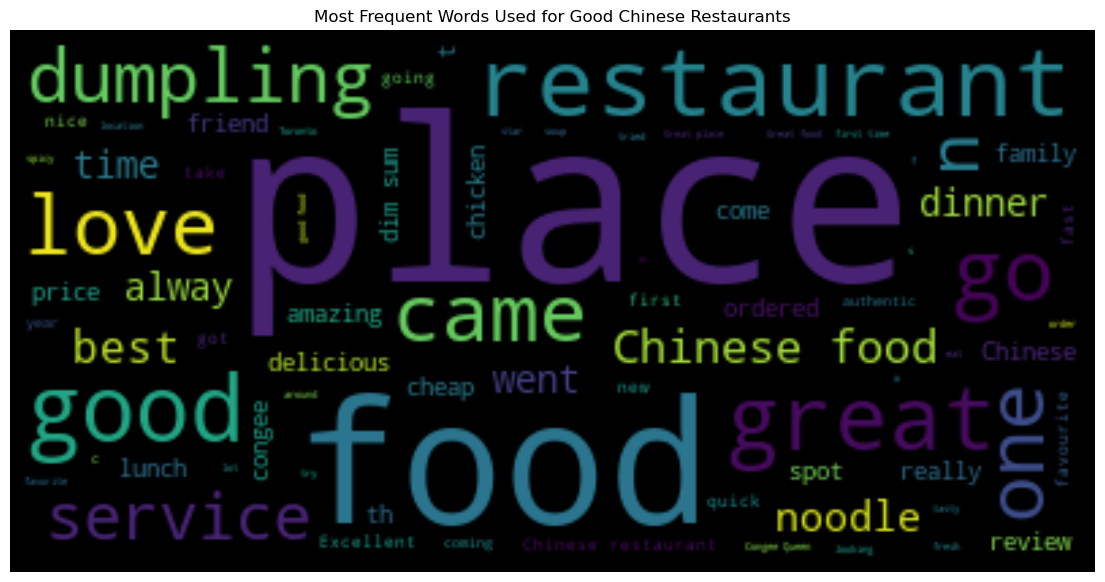

In [25]:
default_colors = wc.to_array()
plt.figure(figsize=(14,12))
plt.title("Most Frequent Words Used for Good Chinese Restaurants")
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
plt.show()

## 7. Create n-grams for good chinese restaurant reviews

In [26]:
import nltk

In [27]:
from nltk.util import ngrams

In [28]:
from nltk.corpus import stopwords

In [29]:
from nltk import word_tokenize

In [30]:
cachedStopWords = set(stopwords.words("english"))
cachedStopWords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [31]:
tokens_good = nltk.word_tokenize(text_chinese_good)

tokens_good

['4',
 'Tried',
 'this',
 'place',
 '3',
 'times',
 'now',
 '.',
 'First',
 'time',
 'it',
 'w',
 '...',
 '6',
 'This',
 'place',
 'surprised',
 'us',
 'with',
 'good',
 'service',
 ',',
 'dec',
 '...',
 '7',
 'So',
 ',',
 'I',
 "'ll",
 'start',
 'with',
 'my',
 'summary',
 '...',
 'amazing',
 'food',
 ',',
 '...',
 '8',
 'Opened',
 '3',
 'days',
 'ago',
 ',',
 'I',
 'tried',
 'it',
 'out',
 'last',
 'night',
 '.',
 '...',
 '9',
 'Recently',
 'opened',
 'up',
 'in',
 'Aurora',
 '!',
 'This',
 'place',
 'is',
 'so',
 '...',
 '11',
 'Yassss',
 'finally',
 'xiao',
 'long',
 'bao',
 '(',
 'soup',
 'dumplings',
 ')',
 '...',
 '15',
 'Now',
 'I',
 'can',
 'avoid',
 'excessive',
 'drives',
 'down',
 'to',
 'Markh',
 '...',
 '16',
 'I',
 'did',
 "n't",
 'even',
 'know',
 'Lee',
 'Chen',
 'existed',
 'until',
 'I',
 'ha',
 '...',
 '17',
 'Those',
 'xiao',
 'long',
 'baos',
 'though',
 '!',
 'Came',
 'here',
 'when',
 'I',
 '...',
 '18',
 'Kudos',
 'to',
 'Lee',
 'Chen',
 'for',
 'filling',
 'th

In [32]:
no_stops_good = [t for t in tokens_good
 if t not in cachedStopWords]



no_stops_good 

['4',
 'Tried',
 'place',
 '3',
 'times',
 '.',
 'First',
 'time',
 'w',
 '...',
 '6',
 'This',
 'place',
 'surprised',
 'us',
 'good',
 'service',
 ',',
 'dec',
 '...',
 '7',
 'So',
 ',',
 'I',
 "'ll",
 'start',
 'summary',
 '...',
 'amazing',
 'food',
 ',',
 '...',
 '8',
 'Opened',
 '3',
 'days',
 'ago',
 ',',
 'I',
 'tried',
 'last',
 'night',
 '.',
 '...',
 '9',
 'Recently',
 'opened',
 'Aurora',
 '!',
 'This',
 'place',
 '...',
 '11',
 'Yassss',
 'finally',
 'xiao',
 'long',
 'bao',
 '(',
 'soup',
 'dumplings',
 ')',
 '...',
 '15',
 'Now',
 'I',
 'avoid',
 'excessive',
 'drives',
 'Markh',
 '...',
 '16',
 'I',
 "n't",
 'even',
 'know',
 'Lee',
 'Chen',
 'existed',
 'I',
 'ha',
 '...',
 '17',
 'Those',
 'xiao',
 'long',
 'baos',
 'though',
 '!',
 'Came',
 'I',
 '...',
 '18',
 'Kudos',
 'Lee',
 'Chen',
 'filling',
 'Chinese',
 'food',
 '...',
 '19',
 'This',
 'place',
 'opened',
 'month',
 '.',
 'Everything',
 '...',
 '20',
 'Blessed',
 'finally',
 'asian',
 'restaurant',
 'th',
 '.

In [33]:
from collections import Counter

In [34]:
Counter(no_stops_good ).most_common(100)

[('...', 4569),
 ('I', 1388),
 ('.', 1193),
 (',', 1070),
 ('place', 878),
 ('food', 654),
 ('!', 564),
 ('This', 517),
 ('The', 381),
 ('Chinese', 359),
 ('good', 323),
 ('restaurant', 319),
 ("'s", 236),
 ('We', 217),
 ('great', 191),
 ('Great', 186),
 ("'ve", 183),
 ('My', 183),
 ('go', 156),
 ("n't", 145),
 ('best', 141),
 ('It', 133),
 ('service', 131),
 ('love', 129),
 ('one', 128),
 (':', 125),
 ('time', 122),
 ('like', 114),
 ('dinner', 110),
 ('lunch', 110),
 ('noodle', 106),
 ('Very', 105),
 ('really', 105),
 ('dumplings', 103),
 ('came', 102),
 ('family', 101),
 ('noodles', 95),
 ('Came', 93),
 ('Good', 93),
 ('always', 93),
 ('A', 89),
 ('times', 87),
 ('authentic', 87),
 ('(', 84),
 ('Food', 84),
 ('congee', 83),
 ('first', 82),
 ('night', 81),
 ('dim', 80),
 ('....', 80),
 ('come', 79),
 ('Congee', 79),
 ('favourite', 77),
 ('rice', 76),
 ('sum', 74),
 ('delicious', 73),
 ('ordered', 72),
 ("'m", 72),
 ('went', 72),
 ('soup', 71),
 ('price', 69),
 ('One', 68),
 ('years', 

In [35]:
cachedStopWords.update(('...','I','podcast','!','.',',','’'))

In [36]:
no_stops_good = [t for t in tokens_good
 if t not in cachedStopWords]

In [37]:
no_stops_good

['4',
 'Tried',
 'place',
 '3',
 'times',
 'First',
 'time',
 'w',
 '6',
 'This',
 'place',
 'surprised',
 'us',
 'good',
 'service',
 'dec',
 '7',
 'So',
 "'ll",
 'start',
 'summary',
 'amazing',
 'food',
 '8',
 'Opened',
 '3',
 'days',
 'ago',
 'tried',
 'last',
 'night',
 '9',
 'Recently',
 'opened',
 'Aurora',
 'This',
 'place',
 '11',
 'Yassss',
 'finally',
 'xiao',
 'long',
 'bao',
 '(',
 'soup',
 'dumplings',
 ')',
 '15',
 'Now',
 'avoid',
 'excessive',
 'drives',
 'Markh',
 '16',
 "n't",
 'even',
 'know',
 'Lee',
 'Chen',
 'existed',
 'ha',
 '17',
 'Those',
 'xiao',
 'long',
 'baos',
 'though',
 'Came',
 '18',
 'Kudos',
 'Lee',
 'Chen',
 'filling',
 'Chinese',
 'food',
 '19',
 'This',
 'place',
 'opened',
 'month',
 'Everything',
 '20',
 'Blessed',
 'finally',
 'asian',
 'restaurant',
 'th',
 '23',
 "'ve",
 'never',
 'enjoyed',
 'fresher',
 'Chinese',
 'food',
 'anywhe',
 '24',
 'Decided',
 'try',
 'place',
 "'s",
 'much',
 '25',
 'Went',
 'Lee',
 'Chen',
 '2',
 'tines',
 'with

In [38]:
Counter(no_stops_good).most_common(100)

[('place', 878),
 ('food', 654),
 ('This', 517),
 ('The', 381),
 ('Chinese', 359),
 ('good', 323),
 ('restaurant', 319),
 ("'s", 236),
 ('We', 217),
 ('great', 191),
 ('Great', 186),
 ("'ve", 183),
 ('My', 183),
 ('go', 156),
 ("n't", 145),
 ('best', 141),
 ('It', 133),
 ('service', 131),
 ('love', 129),
 ('one', 128),
 (':', 125),
 ('time', 122),
 ('like', 114),
 ('dinner', 110),
 ('lunch', 110),
 ('noodle', 106),
 ('Very', 105),
 ('really', 105),
 ('dumplings', 103),
 ('came', 102),
 ('family', 101),
 ('noodles', 95),
 ('Came', 93),
 ('Good', 93),
 ('always', 93),
 ('A', 89),
 ('times', 87),
 ('authentic', 87),
 ('(', 84),
 ('Food', 84),
 ('congee', 83),
 ('first', 82),
 ('night', 81),
 ('dim', 80),
 ('....', 80),
 ('come', 79),
 ('Congee', 79),
 ('favourite', 77),
 ('rice', 76),
 ('sum', 74),
 ('delicious', 73),
 ('ordered', 72),
 ("'m", 72),
 ('went', 72),
 ('soup', 71),
 ('price', 69),
 ('One', 68),
 ('years', 68),
 ('cheap', 67),
 ('-', 66),
 ('chicken', 66),
 ('th', 65),
 ('If',

In [39]:
bigrams = ngrams(no_stops_good, 2)
Counter(bigrams).most_common(30)

[(('This', 'place'), 202),
 (('Chinese', 'food'), 128),
 (('It', "'s"), 81),
 (('The', 'food'), 73),
 (('dim', 'sum'), 70),
 (('Chinese', 'restaurant'), 49),
 (('love', 'place'), 41),
 (('Congee', 'Queen'), 40),
 (('Great', 'food'), 39),
 (('This', 'restaurant'), 37),
 (('late', 'night'), 33),
 (('first', 'time'), 31),
 (('go', 'place'), 30),
 (('My', 'family'), 30),
 (('food', 'great'), 29),
 (('Great', 'place'), 28),
 (('food', 'good'), 27),
 (('Hong', 'Kong'), 27),
 (('This', 'one'), 27),
 (('Very', 'good'), 26),
 (('really', 'good'), 26),
 (('We', 'came'), 25),
 (('good', 'food'), 25),
 (('noodle', 'soup'), 24),
 (('Love', 'place'), 24),
 (('best', 'Chinese'), 24),
 (('great', 'place'), 23),
 (('place', 'great'), 22),
 (('We', 'went'), 22),
 (('authentic', 'Chinese'), 22)]

### Section 7b: Create a counter using lemmatizing for good chinese restraunt reviews

In [40]:
from nltk.stem import WordNetLemmatizer

In [41]:
wordnet_lemmatizer = WordNetLemmatizer()

In [42]:
lemmatized_good = [wordnet_lemmatizer.lemmatize(t) for t in no_stops_good]

In [43]:
text_bow_good = Counter(lemmatized_good)
text_bow_good.most_common(20)

[('place', 930),
 ('food', 662),
 ('This', 517),
 ('The', 381),
 ('Chinese', 359),
 ('restaurant', 352),
 ('good', 323),
 ("'s", 236),
 ('We', 217),
 ('time', 209),
 ('noodle', 201),
 ('great', 191),
 ('Great', 186),
 ("'ve", 183),
 ('My', 183),
 ('go', 162),
 ('dumpling', 156),
 ("n't", 145),
 ('best', 141),
 ('love', 135)]

In [44]:
text_chart_good= pd.DataFrame(text_bow_good.most_common(40), columns =['word', 'freq'])
text_chart_good

,word,freq
0,place,930
1,food,662
2,This,517
3,The,381
4,Chinese,359
5,restaurant,352
6,good,323
7,'s,236
8,We,217
9,time,209


In [45]:
bigrams_lem_good = ngrams(lemmatized_good, 2)
Counter(bigrams_lem_good).most_common(30)

[(('This', 'place'), 204),
 (('Chinese', 'food'), 129),
 (('It', "'s"), 81),
 (('The', 'food'), 73),
 (('dim', 'sum'), 72),
 (('Chinese', 'restaurant'), 54),
 (('love', 'place'), 41),
 (('Congee', 'Queen'), 40),
 (('Great', 'food'), 39),
 (('This', 'restaurant'), 37),
 (('go', 'place'), 33),
 (('late', 'night'), 33),
 (('first', 'time'), 31),
 (('My', 'family'), 30),
 (('food', 'great'), 29),
 (('Great', 'place'), 28),
 (('food', 'good'), 27),
 (('Hong', 'Kong'), 27),
 (('This', 'one'), 27),
 (('Very', 'good'), 26),
 (('really', 'good'), 26),
 (('We', 'came'), 25),
 (('noodle', 'soup'), 25),
 (('good', 'food'), 25),
 (('Love', 'place'), 24),
 (('best', 'Chinese'), 24),
 (('great', 'place'), 23),
 (('My', 'friend'), 23),
 (('place', 'great'), 22),
 (('We', 'went'), 22)]

In [46]:
trigrams_lem_good = ngrams(lemmatized_good, 3)
Counter(trigrams_lem_good).most_common(20)

[(('This', 'place', 'great'), 15),
 (('Hong', 'Kong', 'style'), 14),
 (('best', 'Chinese', 'food'), 12),
 (('hand', 'pulled', 'noodle'), 11),
 (('This', 'great', 'place'), 10),
 (('If', "'re", 'looking'), 10),
 (('food', 'great', 'price'), 10),
 (('dim', 'sum', 'place'), 9),
 (('The', 'food', 'good'), 9),
 (('My', 'go', 'place'), 8),
 (('Chinese', 'food', 'place'), 8),
 (('good', 'Chinese', 'food'), 7),
 (('How', 'food', '?'), 7),
 (('This', 'place', 'best'), 7),
 (('The', 'food', 'delicious'), 7),
 (('This', 'one', 'best'), 7),
 (("n't", 'know', 'place'), 6),
 (('Best', 'Chinese', 'food'), 6),
 (('This', 'place', 'serf'), 6),
 (('craving', 'Chinese', 'food'), 6)]

In [47]:
quadgrams_lem_good = ngrams(lemmatized_good, 4)
Counter(quadgrams_lem_good).most_common(5)

[(('WHAT', 'TO', 'TRY', '?'), 6),
 (('This', 'place', 'hidden', 'gem'), 5),
 (('The', 'food', 'really', 'good'), 3),
 (('This', 'family', "'s", 'go'), 3),
 (('best', 'Chinese', 'food', "'ve"), 3)]

### Section 7c: Explain the results for the n-grams for good chinese restraunt reviews

#### It looks like the food is the primary predictor for chinese restaurant performance.  This makes sense as typical restraunt goers are likely going to restaurant specifically or the unique foods, and not as much for atmosphere or customer service. Furthermore, the foods a chinese restraunt should focus and invest in are dim sum, noodle soup, rice, and potentially serf. This assesssment was based on the n-gram or word frequency associated with reviews greater than 4.

## 8. Create n-grams for 1-star reviews

### Section 8a: Create a counter for bad chinese reviews

In [48]:
cachedStopWords = set(stopwords.words("english"))
cachedStopWords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [49]:
tokens_bad = nltk.word_tokenize(text_chinese_bad)

tokens_bad

['22',
 'Food',
 'is',
 'fine',
 'but',
 'is',
 'way',
 'too',
 'costly',
 '.',
 'Portion',
 'is',
 '...',
 '29',
 'REALLY',
 'BAD',
 'SERVICE',
 '!',
 'DO',
 'NOT',
 'EVER',
 'GO',
 'TO',
 'THIS',
 'R',
 '...',
 '31',
 'Ate',
 'there',
 'twice',
 'and',
 'overall',
 'very',
 'disappointed',
 '...',
 '33',
 'This',
 'place',
 'is',
 'awful',
 '.',
 'It',
 "'s",
 'grossly',
 'overpriced',
 'f',
 '...',
 '34',
 'As',
 'a',
 'native',
 'Shanghainese',
 ',',
 'if',
 'anyone',
 'recommends',
 '...',
 '35',
 'Gave',
 'this',
 'place',
 'a',
 'try',
 'last',
 'week',
 ',',
 'and',
 'ordered',
 't',
 '...',
 '5113',
 'Golden',
 'Duke',
 'just',
 'opened',
 'for',
 'business',
 'yesterday',
 '...',
 '5136',
 'Dim',
 'sum',
 'review',
 '!',
 'Below',
 'average',
 'to',
 'average',
 'quali',
 '...',
 '5146',
 'This',
 'place',
 'is',
 'not',
 'that',
 'good',
 '.',
 'If',
 'you',
 'are',
 'doing',
 '...',
 '5147',
 'Edit',
 ':',
 'It',
 "'s",
 'been',
 '3',
 'months',
 'and',
 'I',
 "'ve",
 'revi

In [50]:
no_stops_bad = [t for t in tokens_bad
 if t not in cachedStopWords]



no_stops_bad

['22',
 'Food',
 'fine',
 'way',
 'costly',
 '.',
 'Portion',
 '...',
 '29',
 'REALLY',
 'BAD',
 'SERVICE',
 '!',
 'DO',
 'NOT',
 'EVER',
 'GO',
 'TO',
 'THIS',
 'R',
 '...',
 '31',
 'Ate',
 'twice',
 'overall',
 'disappointed',
 '...',
 '33',
 'This',
 'place',
 'awful',
 '.',
 'It',
 "'s",
 'grossly',
 'overpriced',
 'f',
 '...',
 '34',
 'As',
 'native',
 'Shanghainese',
 ',',
 'anyone',
 'recommends',
 '...',
 '35',
 'Gave',
 'place',
 'try',
 'last',
 'week',
 ',',
 'ordered',
 '...',
 '5113',
 'Golden',
 'Duke',
 'opened',
 'business',
 'yesterday',
 '...',
 '5136',
 'Dim',
 'sum',
 'review',
 '!',
 'Below',
 'average',
 'average',
 'quali',
 '...',
 '5146',
 'This',
 'place',
 'good',
 '.',
 'If',
 '...',
 '5147',
 'Edit',
 ':',
 'It',
 "'s",
 '3',
 'months',
 'I',
 "'ve",
 'revisited',
 '...',
 '5166',
 'Came',
 'Sunday',
 'morning',
 'dim',
 'sum',
 'husban',
 '...',
 '5177',
 'There',
 "n't",
 'lot',
 'options',
 'choose',
 '...',
 '5178',
 'This',
 'place',
 'horrible',
 '.',

In [51]:
Counter(no_stops_bad).most_common(100)

[('...', 2012),
 ('I', 713),
 ('.', 610),
 (',', 438),
 ('food', 259),
 ('place', 253),
 ('The', 203),
 ('!', 175),
 ('service', 166),
 ('This', 147),
 ("n't", 117),
 ('restaurant', 102),
 ('good', 97),
 ('We', 97),
 ('Food', 92),
 ('ordered', 86),
 ("'s", 77),
 (':', 74),
 ('It', 69),
 ('went', 67),
 ('time', 67),
 ('Chinese', 66),
 ('came', 66),
 ("'ve", 64),
 ('Came', 61),
 ('bad', 59),
 ('lunch', 58),
 ('really', 57),
 ('give', 47),
 ('like', 46),
 ('My', 45),
 ('Ordered', 45),
 ('would', 44),
 ('worst', 42),
 ('ever', 42),
 ('They', 42),
 ('one', 41),
 ('If', 40),
 ('used', 40),
 ('dinner', 38),
 ('order', 38),
 ('come', 37),
 ('family', 36),
 ('....', 35),
 ('Service', 35),
 ('experience', 34),
 ('go', 34),
 ('Worst', 32),
 ('stars', 32),
 ('w', 32),
 ('try', 31),
 ('Not', 31),
 ('last', 30),
 ('review', 30),
 ('quality', 30),
 ('reviews', 30),
 ('first', 29),
 ('Went', 28),
 ('Was', 28),
 ('sum', 27),
 ('night', 27),
 ('rude', 27),
 ('th', 27),
 ('dim', 26),
 ('times', 26),
 ('c

In [52]:
cachedStopWords.update(('...','I','podcast','!','.',',','’'))

In [53]:
no_stops_bad = [t for t in tokens_bad
 if t not in cachedStopWords]

In [54]:
Counter(no_stops_bad).most_common(40)

[('food', 259),
 ('place', 253),
 ('The', 203),
 ('service', 166),
 ('This', 147),
 ("n't", 117),
 ('restaurant', 102),
 ('good', 97),
 ('We', 97),
 ('Food', 92),
 ('ordered', 86),
 ("'s", 77),
 (':', 74),
 ('It', 69),
 ('went', 67),
 ('time', 67),
 ('Chinese', 66),
 ('came', 66),
 ("'ve", 64),
 ('Came', 61),
 ('bad', 59),
 ('lunch', 58),
 ('really', 57),
 ('give', 47),
 ('like', 46),
 ('My', 45),
 ('Ordered', 45),
 ('would', 44),
 ('worst', 42),
 ('ever', 42),
 ('They', 42),
 ('one', 41),
 ('If', 40),
 ('used', 40),
 ('dinner', 38),
 ('order', 38),
 ('come', 37),
 ('family', 36),
 ('....', 35),
 ('Service', 35)]

In [55]:
bigrams = ngrams(no_stops_bad, 2)
Counter(bigrams).most_common(20)

[(('This', 'place'), 72),
 (('The', 'food'), 58),
 (('dim', 'sum'), 24),
 (('Chinese', 'food'), 21),
 (('It', "'s"), 19),
 (('We', 'ordered'), 19),
 (('customer', 'service'), 17),
 (('Do', "n't"), 16),
 (('The', 'service'), 15),
 (('first', 'time'), 14),
 (('We', 'went'), 13),
 (('This', 'restaurant'), 12),
 (('give', 'place'), 12),
 (('fried', 'rice'), 12),
 (('*', '*'), 12),
 (('quality', 'food'), 11),
 (('Worst', 'service'), 11),
 (('First', 'time'), 11),
 (('service', 'ever'), 10),
 (('ca', "n't"), 10)]

### Section 8b: Create a counter using lemmatizing for bad chinese restaurant reviews

In [56]:
lemmatized_bad = [wordnet_lemmatizer.lemmatize(t) for t in no_stops_bad]

In [57]:
text_bow_bad = Counter(lemmatized_bad)
text_bow_bad.most_common(20)

[('food', 262),
 ('place', 256),
 ('The', 203),
 ('service', 168),
 ('This', 147),
 ("n't", 117),
 ('restaurant', 107),
 ('good', 97),
 ('We', 97),
 ('time', 93),
 ('Food', 92),
 ('ordered', 86),
 ("'s", 77),
 (':', 74),
 ('It', 69),
 ('went', 67),
 ('Chinese', 66),
 ('came', 66),
 ("'ve", 64),
 ('Came', 61)]

In [58]:
text_chart_bad= pd.DataFrame(text_bow_bad.most_common(40), columns =['word', 'freq'])
text_chart_bad

,word,freq
0,food,262
1,place,256
2,The,203
3,service,168
4,This,147
5,n't,117
6,restaurant,107
7,good,97
8,We,97
9,time,93


In [59]:
bigrams_lem_bad = ngrams(lemmatized_bad, 2)
Counter(bigrams_lem_bad).most_common(30)

[(('This', 'place'), 72),
 (('The', 'food'), 58),
 (('dim', 'sum'), 24),
 (('Chinese', 'food'), 21),
 (('It', "'s"), 19),
 (('We', 'ordered'), 19),
 (('customer', 'service'), 18),
 (('Do', "n't"), 16),
 (('The', 'service'), 15),
 (('first', 'time'), 14),
 (('We', 'went'), 13),
 (('This', 'restaurant'), 12),
 (('give', 'place'), 12),
 (('fried', 'rice'), 12),
 (('star', 'would'), 12),
 (('*', '*'), 12),
 (('quality', 'food'), 11),
 (('Worst', 'service'), 11),
 (('First', 'time'), 11),
 (('0', 'star'), 10),
 (('service', 'ever'), 10),
 (('ca', "n't"), 10),
 (('We', 'came'), 9),
 (('Chinese', 'restaurant'), 9),
 (('last', 'night'), 9),
 (('Congee', 'Queen'), 9),
 (('bad', 'service'), 8),
 (('Terrible', 'service'), 8),
 (('Food', 'ok'), 8),
 (('My', 'family'), 8)]

In [60]:
trigrams_lem_bad = ngrams(lemmatized_bad, 3)
Counter(trigrams_lem_bad).most_common(20)

[(('Worst', 'service', 'ever'), 7),
 (('Came', 'dim', 'sum'), 6),
 (('If', 'could', 'give'), 6),
 (('*', '*', '*'), 6),
 (('give', '0', 'star'), 5),
 (('0', 'star', 'would'), 5),
 (('The', 'food', 'decent'), 5),
 (('This', 'first', 'time'), 4),
 (('worst', 'Chinese', 'food'), 4),
 (('The', 'food', 'ok'), 4),
 (('This', 'place', 'good'), 3),
 (('wanted', 'like', 'place'), 3),
 (('good', 'thing', 'place'), 3),
 (('really', 'bad', 'service'), 3),
 (('Mother', "'s", 'Day'), 3),
 (('Food', 'ok', 'service'), 3),
 (('hand', 'pulled', 'noodle'), 3),
 (('We', 'went', 'dinner'), 3),
 (('customer', 'service', 'ever'), 3),
 (('came', 'lunch', 'today'), 3)]

In [61]:
quadgrams_lem_bad = ngrams(lemmatized_bad, 4)
Counter(quadgrams_lem_bad).most_common(5)

[(('give', 'place', '0', 'star'), 3),
 (('Food', 'pretty', 'good', 'service'), 2),
 (('If', 'could', 'give', 'negative'), 2),
 (('could', 'give', 'negative', 'star'), 2),
 (('give', 'negative', 'star', 'would'), 2)]

### Section 8c: Explain the results for the n-grams for bad chinese restraurant reviews

#### Bad chinese restraunts had bad customer service or food according to the ngrams. Really good Chinese restraunts distinguish themselves with really good customer service. Bad chinese restraunts have neither, but the bad service does stand out more.

## 9. Analyze the results for good and bad chinese restraunts

### Section 9a: Create a DataFrame for tri-grams for good and bad chinese restraunts

In [62]:
pd.set_option('display.max_colwidth', -1)
df_rest_reviews_chinese[df_rest_reviews_chinese['text'].str.contains("dim")]

C:\Users\hp\AppData\Local\Temp\ipykernel_19256\680444058.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Unnamed: 0_x,business_id,name_x,review_id,user_id,stars,useful_x,funny_x,cool_x,text,date,Unnamed: 0_y,name_y,review_count_x,yelping_since,useful_y,funny_y,cool_y,elite,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,Unnamed: 0,name,address,city,state,postal_code,latitude,longitude,review_count_y,is_open,attributes,categories,hours
5,111960,n6eRADUe9PXz3qfZ69hT8A,Lee Chen Asian Bistro,zy_I3bySKKbj1vrPncyQ9Q,hrYOEsw6YkYTf9joi_styw,3.0,4.0,0.0,0.0,"My first impression on this new restaurant in the Walmart plaza st Wellington/Leslie is very positive. The decor is modern with a touch of traditional Chinese; cleanliness is very good and service is efficient and polite. Seating is very comfortable and the ambience is very good. Ordering with a cool iPad is neat too.\n\nNow the food: well presented, food was fresh/clean, decent tasting (not as good as ""gold standard"" in Shanghai food in the city but acceptable. Food portions are very small for the PRICE! The menu choices are good but there is nothing special such as signature dishes. Basically this is your typical Shanghai and Chinese food menu you would see in Markham and Rhill.\n\nSo what happened? Where did the ball get dropped? Pricing is waaay out of line! There are a few items on the menu that is consistent with other places just south of here but for the most part, the items are about 25% more than comparable places in Markham and RIchmond Hill. They also charged $2.99 for tea like dim sum places which is not consistent with other similar places. \n\nThe last place that when out of business in this spot had the same issue (pricing too high). I'm not sure if the rent is too high in this mall that pricing needs to reflect it or the owners believe that since they are ""the only game in town"", they can charge a premium. The reality is most people who live close to here will just drive the 15 minutes to FMP so they are not really ""the only place"" around here. Hopefully adjustments can be made or this may my last visit here which is a shame since this place has so much to offer.",2018-10-20 18:15:55,1003309,Dennis,194,2015-09-20 22:14:52,190,35,76,"2016,2017,2018",6,3.81,1,1,0,0,0,3,3,3,3,4,3,38737,Lee Chen Asian Bistro,"84 First Commerce Drive, Unit 5",Aurora,ON,L4G 0H5,44.013130,-79.415485,31,1,"{'GoodForMeal': ""{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'brunch': False, 'breakfast': False}"", 'HasTV': 'True', 'Ambience': ""{'touristy': False, 'hipster': False, 'romantic': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': False, 'casual': False}"", 'GoodForKids': 'True', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}""}","Restaurants, Chinese","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:0', 'Wednesday': '11:30-22:0', 'Thursday': '11:30-22:0', 'Friday': '11:30-22:0', 'Saturday': '11:30-22:0', 'Sunday': '11:30-22:0'}"
9,111957,n6eRADUe9PXz3qfZ69hT8A,Lee Chen Asian Bistro,6tXwB7PV3Uy4HWoZJj7hbg,w5bwTIjGTebtlWEEAxfKhg,4.0,2.0,0.0,1.0,"Recently opened up in Aurora! This place is so close to home and Walmart is just across the street! The place is well lit, very nicely furnished and extremely clean. It has a good contrast of colours with classic Asian furniture.\n\nThe food was also pretty good too. I really enjoyed the soup filled xiao long baos! They were super juicy and the meat was perfect! The sweet and sour chicken was also pretty good. What stood out was the use of chicken breast. Most Chinese restaurants serve it with dark meat and ton of batter too. The white rice came in a little ""long"", something I don't see often or at all (correct me if I'm wrong). The ""long"" came with a lid on top, so it kept the rice hot throughout dinner - points for thoughtfulness! The spare ribs were awesome too, though not the w

In [63]:
pd.set_option('display.max_colwidth', -1)
df_rest_reviews_chinese[df_rest_reviews_chinese['text'].str.contains("noodle")]

C:\Users\hp\AppData\Local\Temp\ipykernel_19256\3063678117.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Unnamed: 0_x,business_id,name_x,review_id,user_id,stars,useful_x,funny_x,cool_x,text,date,Unnamed: 0_y,name_y,review_count_x,yelping_since,useful_y,funny_y,cool_y,elite,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,Unnamed: 0,name,address,city,state,postal_code,latitude,longitude,review_count_y,is_open,attributes,categories,hours
8,111965,n6eRADUe9PXz3qfZ69hT8A,Lee Chen Asian Bistro,pTVcg2mhGTV1oYRdZFCHqA,nhdcRg-PdipWhVb8aH398A,4.0,0.0,0.0,0.0,"Opened 3 days ago, I tried it out last night. DECOR: So nice! Modern and sleek but still had some complementary Asian accent pieces and artwork. SERVICE: totally impressed that everyone spoke perfect English. Service was attentive. You browse and order off a mini iPad. FOOD: Portions were small but food overall had good flavour. The soup filled dumpling - skin could have been better, was a bit gummy. Hot and sour noodle soup - kudos for the fresh noodles that was super long! Black pepper beef was so tender and had a nice kick. Sweet and sour fish was good. The pancakes were so crispy and savoury while it was nice and hot! PRICE: the downside is the prices. Prices are very high. Most entrees were $16+ even fried rice and fried noodles which you can find a lot cheaper in Richmond hill/Markham.",2018-09-13 23:24:06,1131527,C.,64,2013-10-13 18:14:54,9,5,0,NaN,0,3.20,0,0,0,0,0,0,0,1,1,0,0,38737,Lee Chen Asian Bistro,"84 First Commerce Drive, Unit 5",Aurora,ON,L4G 0H5,44.013130,-79.415485,31,1,"{'GoodForMeal': ""{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'brunch': False, 'breakfast': False}"", 'HasTV': 'True', 'Ambience': ""{'touristy': False, 'hipster': False, 'romantic': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': False, 'casual': False}"", 'GoodForKids': 'True', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}""}","Restaurants, Chinese","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:0', 'Wednesday': '11:30-22:0', 'Thursday': '11:30-22:0', 'Friday': '11:30-22:0', 'Saturday': '11:30-22:0', 'Sunday': '11:30-22:0'}"
10,111971,n6eRADUe9PXz3qfZ69hT8A,Lee Chen Asian Bistro,Ss4jvW9U4AF98uFTwOUl_w,w5bwTIjGTebtlWEEAxfKhg,3.0,4.0,1.0,1.0,"Second visit and still enjoying the food and service here. Again, pricing was ridiculous. $15.xx or $16.xx per dish. This time I was extremely disappointed with the braised tofu dish in the veggies section. It was ridiculously small and I kid you not it was one handful of tofu, shanghai bak choi, bamboo shoot and shitake mushrooms (few pieces). I was actually shocked when it came. Sitting there, I looked at my wife and thought to myself.. You have the audacity to hand me a dish like That? Otherwise everything else was good, especially the noodles and scallion pan cake NOMS! \n\nWe are officially banning this place from our list of restaurants to go to. This will be a last resort restaurant for us as we cannot comprehend the price to portion.. Honestly, even the appetizers aren't cheap.",2018-09-27 21:46:39,1314597,Alfred,237,2013-12-28 00:51:36,433,215,265,"2014,2015,2016,2017,2018",24,3.81,29,3,0,0,0,25,33,33,33,17,16,38737,Lee Chen Asian Bistro,"84 First Commerce Drive, Unit 5",Aurora,ON,L4G 0H5,44.013130,-79.415485,31,1,"{'GoodForMeal': ""{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'brunch': False, 'breakfast': False}"", 'HasTV': 'True', 'Ambience': ""{'touristy': False, 'hipster': False, 'romantic': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': False, 'casual': False}"", 'GoodForKids': 'True', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}""}","Restaurants, Chinese","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:0', 'Wednesday': '11:30-22:0', 'Thursday': '11:30-22:0', 'Friday': '11:30-2

In [64]:
pd.set_option('display.max_colwidth', -1)
df_rest_reviews_chinese[df_rest_reviews_chinese['text'].str.contains("rice")]

C:\Users\hp\AppData\Local\Temp\ipykernel_19256\3727998824.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Unnamed: 0_x,business_id,name_x,review_id,user_id,stars,useful_x,funny_x,cool_x,text,date,Unnamed: 0_y,name_y,review_count_x,yelping_since,useful_y,funny_y,cool_y,elite,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,Unnamed: 0,name,address,city,state,postal_code,latitude,longitude,review_count_y,is_open,attributes,categories,hours
4,111974,n6eRADUe9PXz3qfZ69hT8A,Lee Chen Asian Bistro,aJfHOI9WdHQcb8YHBM1Waw,coSXdeklwuZWjjS0n38Tcg,5.0,0.0,0.0,0.0,"Tried this place 3 times now. First time it was dine in lunch. We got 2 business lunch combos. Both great. Portion sizes were big enough that we took some away. We then tried them for dinner. Once again it was really good. Especially their chow mien. We had the kung pao chicken, Shezuan Shrimp, chow mien and a few appetizers. The 3rd time, we did take out. All 3 avenues of ordering were great. Some reviews say this place is expensive and portion sizes are small. I believe the portion sized are good and the prices are reflective of quality food. I would highly recommend this place for great quality food, great ambience, cleanliness and overall experience.",2019-08-09 19:19:05,893172,Jay,5,2017-10-30 11:37:05,1,1,0,NaN,0,3.60,0,0,0,0,0,0,0,0,0,0,0,38737,Lee Chen Asian Bistro,"84 First Commerce Drive, Unit 5",Aurora,ON,L4G 0H5,44.013130,-79.415485,31,1,"{'GoodForMeal': ""{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'brunch': False, 'breakfast': False}"", 'HasTV': 'True', 'Ambience': ""{'touristy': False, 'hipster': False, 'romantic': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': False, 'casual': False}"", 'GoodForKids': 'True', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}""}","Restaurants, Chinese","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:0', 'Wednesday': '11:30-22:0', 'Thursday': '11:30-22:0', 'Friday': '11:30-22:0', 'Saturday': '11:30-22:0', 'Sunday': '11:30-22:0'}"
7,111961,n6eRADUe9PXz3qfZ69hT8A,Lee Chen Asian Bistro,9cjF7juQc-Xa5DseN-Wwvw,CZdIOLep9szqUkE3VfDZag,5.0,1.0,1.0,1.0,"So, I'll start with my summary...amazing food, and great service and just a bit pricey. I would call it 4.5 stars. The service for us really was excellent. Attentive without being intrusive and somebody was always there to clear dirty plates away. So, we tried most of the dumplings and all were awesome. The xiao long bao soup dumplings were the star for sure, but the pan fried pork dumplings weren't far behind. The wonton soup was definitely fresh made from scratch...great broth and hand made pork wontons. They had brown rice available, which can be hard to get in similar restaurants and it was perfectly cooked. The beef with broccoli was also perfect...rice amount of sauce, tender beef and crisp veggies. Finish with the black sesame balls rolled in peanut. A perfect dessert. All in all, it's more than you'd pay at most Asian places like this, but I don't mind paying more when both the food and service are better.",2018-11-17 23:49:20,296595,Chris,97,2014-07-29 01:58:15,64,12,18,"2016,2017,2018",2,4.02,0,0,0,0,0,4,4,3,3,3,0,38737,Lee Chen Asian Bistro,"84 First Commerce Drive, Unit 5",Aurora,ON,L4G 0H5,44.013130,-79.415485,31,1,"{'GoodForMeal': ""{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'brunch': False, 'breakfast': False}"", 'HasTV': 'True', 'Ambience': ""{'touristy': False, 'hipster': False, 'romantic': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': False, 'casual': False}"", 'GoodForKids': 'True', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}""}","Restaurants, Chinese","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:0', 'Wednesday': '11:30-22:0', 'Thursday': '11:30-22:0', 'Friday': '11:30-22:0', 'Saturday': '11:30-22:0', 'Su

### Section 9b: Create a DataFrame for tri-grams for good and bad chinese restraunts

In [70]:
trigrams_lem_bad = ngrams(lemmatized_bad, 3)
Counter(trigrams_lem_bad).most_common(20)

[(('Worst', 'service', 'ever'), 7),
 (('Came', 'dim', 'sum'), 6),
 (('If', 'could', 'give'), 6),
 (('*', '*', '*'), 6),
 (('give', '0', 'star'), 5),
 (('0', 'star', 'would'), 5),
 (('The', 'food', 'decent'), 5),
 (('This', 'first', 'time'), 4),
 (('worst', 'Chinese', 'food'), 4),
 (('The', 'food', 'ok'), 4),
 (('This', 'place', 'good'), 3),
 (('wanted', 'like', 'place'), 3),
 (('good', 'thing', 'place'), 3),
 (('really', 'bad', 'service'), 3),
 (('Mother', "'s", 'Day'), 3),
 (('Food', 'ok', 'service'), 3),
 (('hand', 'pulled', 'noodle'), 3),
 (('We', 'went', 'dinner'), 3),
 (('customer', 'service', 'ever'), 3),
 (('came', 'lunch', 'today'), 3)]

In [71]:
df_trigram_bad = pd.DataFrame(text_bow_bad.most_common(20), columns =['word_bad', 'freq_bad'])
df_trigram_bad

,word_bad,freq_bad
0,food,262
1,place,256
2,The,203
3,service,168
4,This,147
5,n't,117
6,restaurant,107
7,good,97
8,We,97
9,time,93


In [72]:
trigrams_lem_good = ngrams(lemmatized_good, 3)
Counter(trigrams_lem_good).most_common(20)

[(('This', 'place', 'great'), 15),
 (('Hong', 'Kong', 'style'), 14),
 (('best', 'Chinese', 'food'), 12),
 (('hand', 'pulled', 'noodle'), 11),
 (('This', 'great', 'place'), 10),
 (('If', "'re", 'looking'), 10),
 (('food', 'great', 'price'), 10),
 (('dim', 'sum', 'place'), 9),
 (('The', 'food', 'good'), 9),
 (('My', 'go', 'place'), 8),
 (('Chinese', 'food', 'place'), 8),
 (('good', 'Chinese', 'food'), 7),
 (('How', 'food', '?'), 7),
 (('This', 'place', 'best'), 7),
 (('The', 'food', 'delicious'), 7),
 (('This', 'one', 'best'), 7),
 (("n't", 'know', 'place'), 6),
 (('Best', 'Chinese', 'food'), 6),
 (('This', 'place', 'serf'), 6),
 (('craving', 'Chinese', 'food'), 6)]

In [73]:
df_trigram_good = pd.DataFrame(text_bow_good.most_common(20), columns =['word_good', 'freq_good'])
df_trigram_good

,word_good,freq_good
0,place,930
1,food,662
2,This,517
3,The,381
4,Chinese,359
5,restaurant,352
6,good,323
7,'s,236
8,We,217
9,time,209


In [74]:
df_trigrams_goodandbad=pd.concat([df_trigram_bad, df_trigram_good], axis=1)

df_trigrams_goodandbad

,word_bad,freq_bad,word_good,freq_good
0,food,262,place,930
1,place,256,food,662
2,The,203,This,517
3,service,168,The,381
4,This,147,Chinese,359
5,n't,117,restaurant,352
6,restaurant,107,good,323
7,good,97,'s,236
8,We,97,We,217
9,time,93,time,209


### Section 9c: Explain the results from your analysis

### Food is ranked at the top for word frequency for bad reviews and places 2nd for good reviews. A chinese restraunt really needs to ivnest in it's food, specifally noodles(ranked 11) and dumpings(ranked 17).